In [52]:
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
endpoint = 'https://api.vndb.org/kana/vn'

# filters = ["and", 
#             ["olang", "=", "ja"],
#             ["popularity", ">=", "90"]]

filters = ["olang", "=", "ja"]

fields = "id, title, released, length_minutes, rating, popularity, tags.id"


query = {
  "filters": filters,
  "fields": fields,
  "sort": "popularity",
  "reverse": True,
  "results": 100,
  "page": 1,
  # "user": False,
  "count": False,
  "compact_filters": False,
  "normalized_filters": False
}

In [54]:
n_pages = 5
dataframes = []

for page in range(1, n_pages+1):
    query['page'] = page
    response = requests.post(endpoint, json=query)
    data = json.loads(response.text)['results']
    dataframes.append(pd.DataFrame(data))

df = pd.concat(dataframes, ignore_index=True)
df

title  length_minutes  rating  \
0                                Fate/stay night          5160.0    86.1   
1                                    Saya no Uta           375.0    80.1   
2                                    STEINS;GATE          2636.0    90.0   
3    Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-          4500.0    83.8   
4                               G-senjou no Maou          2100.0    82.9   
..                                           ...             ...     ...   
995                                   Yanderella            90.0    57.7   
996             Hare Nochi Kitto Nanohana Biyori          1579.0    72.7   
997                     LEWDNESS ~Vita Sexualis~             NaN    72.3   
998                                  BUNNYBLACK3          3600.0    74.0   
999                              Futamata Ren'ai          1740.0    73.4   

     popularity      id                                               tags  \
0        100.00     v11  [{'id': 'g4'}, {'id': 'g9'}, {'id': 'g6'}, {'i...   
1         91.14     v97  [{'id': 'g23'}, {'id': 'g8'}, {'id': 'g19'}, {...   
2         88.15   v2002  [{'id': 'g19'}, {'id': 'g32'}, {'id': 'g147'},...   
3         80.69   v5154  [{'id': 'g23'}, {'id': 'g32'}, {'id': 'g292'},...   
4         78.95    v211  [{'id': 'g23'}, {'id': 'g19'}, {'id': 'g32'}, ...   
..          ...     ...                                                ...   
995        1.95  v16320  [{'id': 'g297'}, {'id': 'g349'}, {'id': 'g337'...   
996        1.95  v14886  [{'id': 'g23'}, {'id': 'g174'}, {'id': 'g163'}...   
997        1.95   v8524  [{'id': 'g1824'}, {'id': 'g2237'}, {'id': 'g49...   
998        1.95  v12186  [{'id': 'g23'}, {'id': 'g2'}, {'id': 'g4'}, {'...   
999        1.95  v32811  [{'id': 'g875'}, {'id': 'g1312'}, {'id': 'g223...   

       released  
0    2004-01-30  
1    2003-12-26  
2    2009-10-15  
3    2011-02-25  
4    2008-05-29  
..          ...  
995  2013-08-29  
996  2014-08-29  
997  2012-06-22  
998  2013-06-21  
999  2022-04-28  

[1000 rows x 7 columns]

In [55]:
df = df.dropna().reset_index()
df

index                                        title  length_minutes  \
0        0                              Fate/stay night          5160.0   
1        1                                  Saya no Uta           375.0   
2        2                                  STEINS;GATE          2636.0   
3        3  Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-          4500.0   
4        4                             G-senjou no Maou          2100.0   
..     ...                                          ...             ...   
951    994     '&' - Sora no Mukou de Sakimasu You ni -          1680.0   
952    995                                   Yanderella            90.0   
953    996             Hare Nochi Kitto Nanohana Biyori          1579.0   
954    998                                  BUNNYBLACK3          3600.0   
955    999                              Futamata Ren'ai          1740.0   

     rating  popularity      id  \
0      86.1      100.00     v11   
1      80.1       91.14     v97   
2      90.0       88.15   v2002   
3      83.8       80.69   v5154   
4      82.9       78.95    v211   
..      ...         ...     ...   
951    71.7        1.95   v7636   
952    57.7        1.95  v16320   
953    72.7        1.95  v14886   
954    74.0        1.95  v12186   
955    73.4        1.95  v32811   

                                                  tags    released  
0    [{'id': 'g4'}, {'id': 'g9'}, {'id': 'g6'}, {'i...  2004-01-30  
1    [{'id': 'g23'}, {'id': 'g8'}, {'id': 'g19'}, {...  2003-12-26  
2    [{'id': 'g19'}, {'id': 'g32'}, {'id': 'g147'},...  2009-10-15  
3    [{'id': 'g23'}, {'id': 'g32'}, {'id': 'g292'},...  2011-02-25  
4    [{'id': 'g23'}, {'id': 'g19'}, {'id': 'g32'}, ...  2008-05-29  
..                                                 ...         ...  
951  [{'id': 'g19'}, {'id': 'g1446'}, {'id': 'g2159...  2012-03-30  
952  [{'id': 'g297'}, {'id': 'g349'}, {'id': 'g337'...  2013-08-29  
953  [{'id': 'g23'}, {'id': 'g174'}, {'id': 'g163'}...  2014-08-29  
954  [{'id': 'g23'}, {'id': 'g2'}, {'id': 'g4'}, {'...  2013-06-21  
955  [{'id': 'g875'}, {'id': 'g1312'}, {'id': 'g223...  2022-04-28  

[956 rows x 8 columns]

In [56]:
df['released'] = pd.to_datetime(df['released'])
df['released_unix'] = (df['released'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df['tags'] = df['tags'].apply(lambda tag_list: [tag['id'] for tag in tag_list])
df['number_tags'] = df['tags'].apply(len)
df

index                                        title  length_minutes  \
0        0                              Fate/stay night          5160.0   
1        1                                  Saya no Uta           375.0   
2        2                                  STEINS;GATE          2636.0   
3        3  Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-          4500.0   
4        4                             G-senjou no Maou          2100.0   
..     ...                                          ...             ...   
951    994     '&' - Sora no Mukou de Sakimasu You ni -          1680.0   
952    995                                   Yanderella            90.0   
953    996             Hare Nochi Kitto Nanohana Biyori          1579.0   
954    998                                  BUNNYBLACK3          3600.0   
955    999                              Futamata Ren'ai          1740.0   

     rating  popularity      id  \
0      86.1      100.00     v11   
1      80.1       91.14     v97   
2      90.0       88.15   v2002   
3      83.8       80.69   v5154   
4      82.9       78.95    v211   
..      ...         ...     ...   
951    71.7        1.95   v7636   
952    57.7        1.95  v16320   
953    72.7        1.95  v14886   
954    74.0        1.95  v12186   
955    73.4        1.95  v32811   

                                                  tags   released  \
0    [g4, g9, g6, g19, g2, g32, g23, g250, g58, g13... 2004-01-30   
1    [g23, g8, g19, g117, g156, g633, g420, g1897, ... 2003-12-26   
2    [g19, g32, g147, g188, g133, g3397, g783, g201... 2009-10-15   
3    [g23, g32, g292, g79, g147, g139, g195, g756, ... 2011-02-25   
4    [g23, g19, g32, g48, g598, g1335, g698, g2390,... 2008-05-29   
..                                                 ...        ...   
951  [g19, g1446, g2159, g1376, g1558, g530, g108, ... 2012-03-30   
952  [g297, g349, g337, g433, g602, g876, g246, g13... 2013-08-29   
953  [g23, g174, g163, g201, g3159, g554, g1713, g1... 2014-08-29   
954  [g23, g2, g4, g274, g154, g2110, g877, g2407, ... 2013-06-21   
955  [g875, g1312, g2232, g1581, g2512, g606, g2149... 2022-04-28   

     released_unix  number_tags  
0       1075420800          181  
1       1072396800          117  
2       1255564800           99  
3       1298592000          137  
4       1212019200          133  
..             ...          ...  
951     1333065600           43  
952     1377734400           47  
953     1409270400           65  
954     1371772800           62  
955     1651104000           26  

[956 rows x 10 columns]

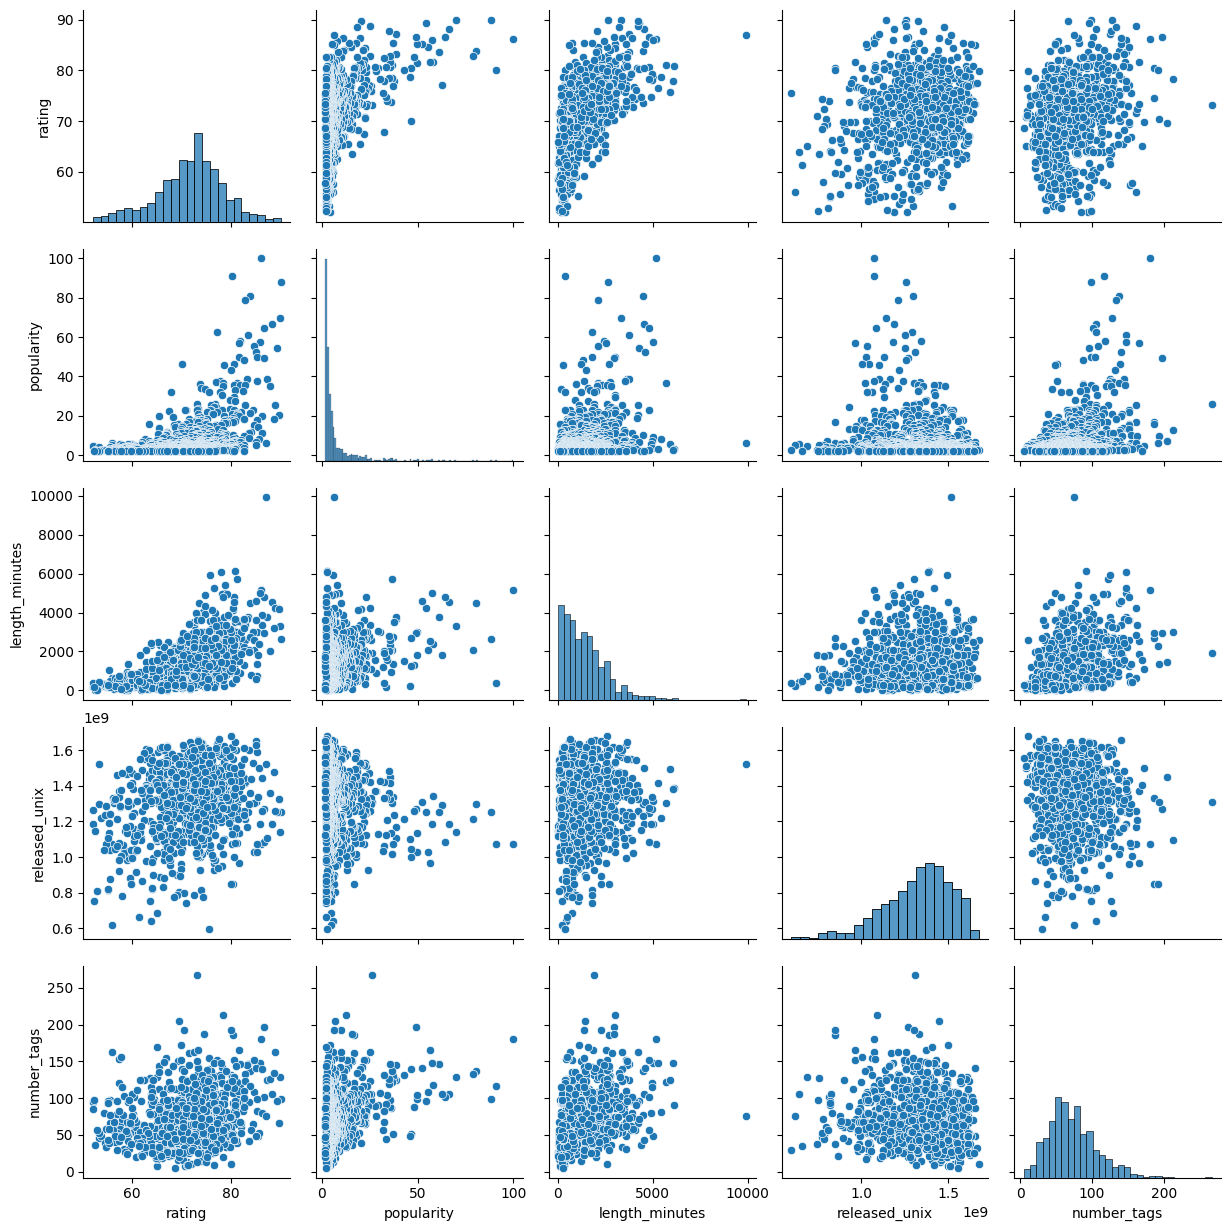

In [57]:
subdf = df[['rating', 'popularity', 'length_minutes', 'released_unix', 'number_tags']]

sns.pairplot(subdf)

Text(0.5, 0, 'Number of tags')

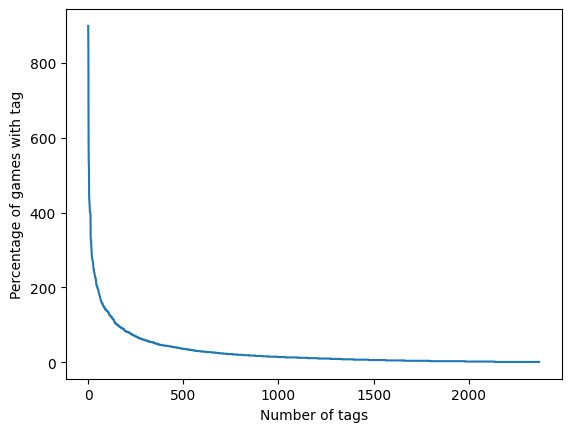

In [58]:
fraction_per_tag = df['tags'].explode().value_counts()

plt.plot(list(fraction_per_tag))
# plt.plot([0, 1450], [10, 10])
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel('Percentage of games with tag')
plt.xlabel('Number of tags')

In [59]:
cutoff_fraction = 10 / 100 * len(df)  # keep tags which appear in x% of games
cutoff_tag = len(fraction_per_tag) - len(fraction_per_tag[fraction_per_tag < cutoff_fraction])  

tags_to_keep = fraction_per_tag[:cutoff_tag].index

fraction_per_tag[:cutoff_tag]

g32      899
g133     823
g728     582
g148     536
g733     517
        ... 
g1454     97
g599      97
g1343     97
g1086     96
g1467     96
Name: tags, Length: 164, dtype: int64

In [60]:
tag_df = pd.DataFrame(np.zeros((len(df), len(tags_to_keep))), columns=tags_to_keep)

for tag in tags_to_keep:
    tag_df[tag] = df['tags'].apply(lambda l: tag in l)

tag_df

g32  g133  g728   g148   g733  g3171   g633    g96  g1581  g1297  ...  \
0     True  True  True   True   True   True   True  False   True   True  ...   
1    False  True  True   True  False  False   True   True   True  False  ...   
2     True  True  True   True  False  False  False   True  False  False  ...   
3     True  True  True   True   True   True   True   True   True   True  ...   
4     True  True  True   True   True   True   True   True   True  False  ...   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
951   True  True  True  False   True  False   True   True  False  False  ...   
952   True  True  True   True  False  False  False  False  False  False  ...   
953   True  True  True   True  False   True   True  False  False  False  ...   
954   True  True  True  False   True   True  False  False   True  False  ...   
955   True  True  True   True  False  False  False  False   True  False  ...   

      g580   g215   g180   g709  g1764  g1454   g599  g1343  g1086  g1467  
0    False  False   True  False  False  False   True  False  False  False  
1    False  False  False  False  False  False  False  False  False  False  
2    False  False  False  False  False  False  False   True  False  False  
3    False  False  False  False  False  False  False   True  False   True  
4     True   True   True  False  False  False  False   True  False   True  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
951  False  False  False  False  False  False  False  False  False  False  
952   True  False  False  False  False  False  False   True  False   True  
953  False   True  False  False  False  False  False  False  False  False  
954  False  False  False  False  False  False  False  False  False  False  
955  False  False  False  False  False  False  False  False  False  False  

[956 rows x 164 columns]

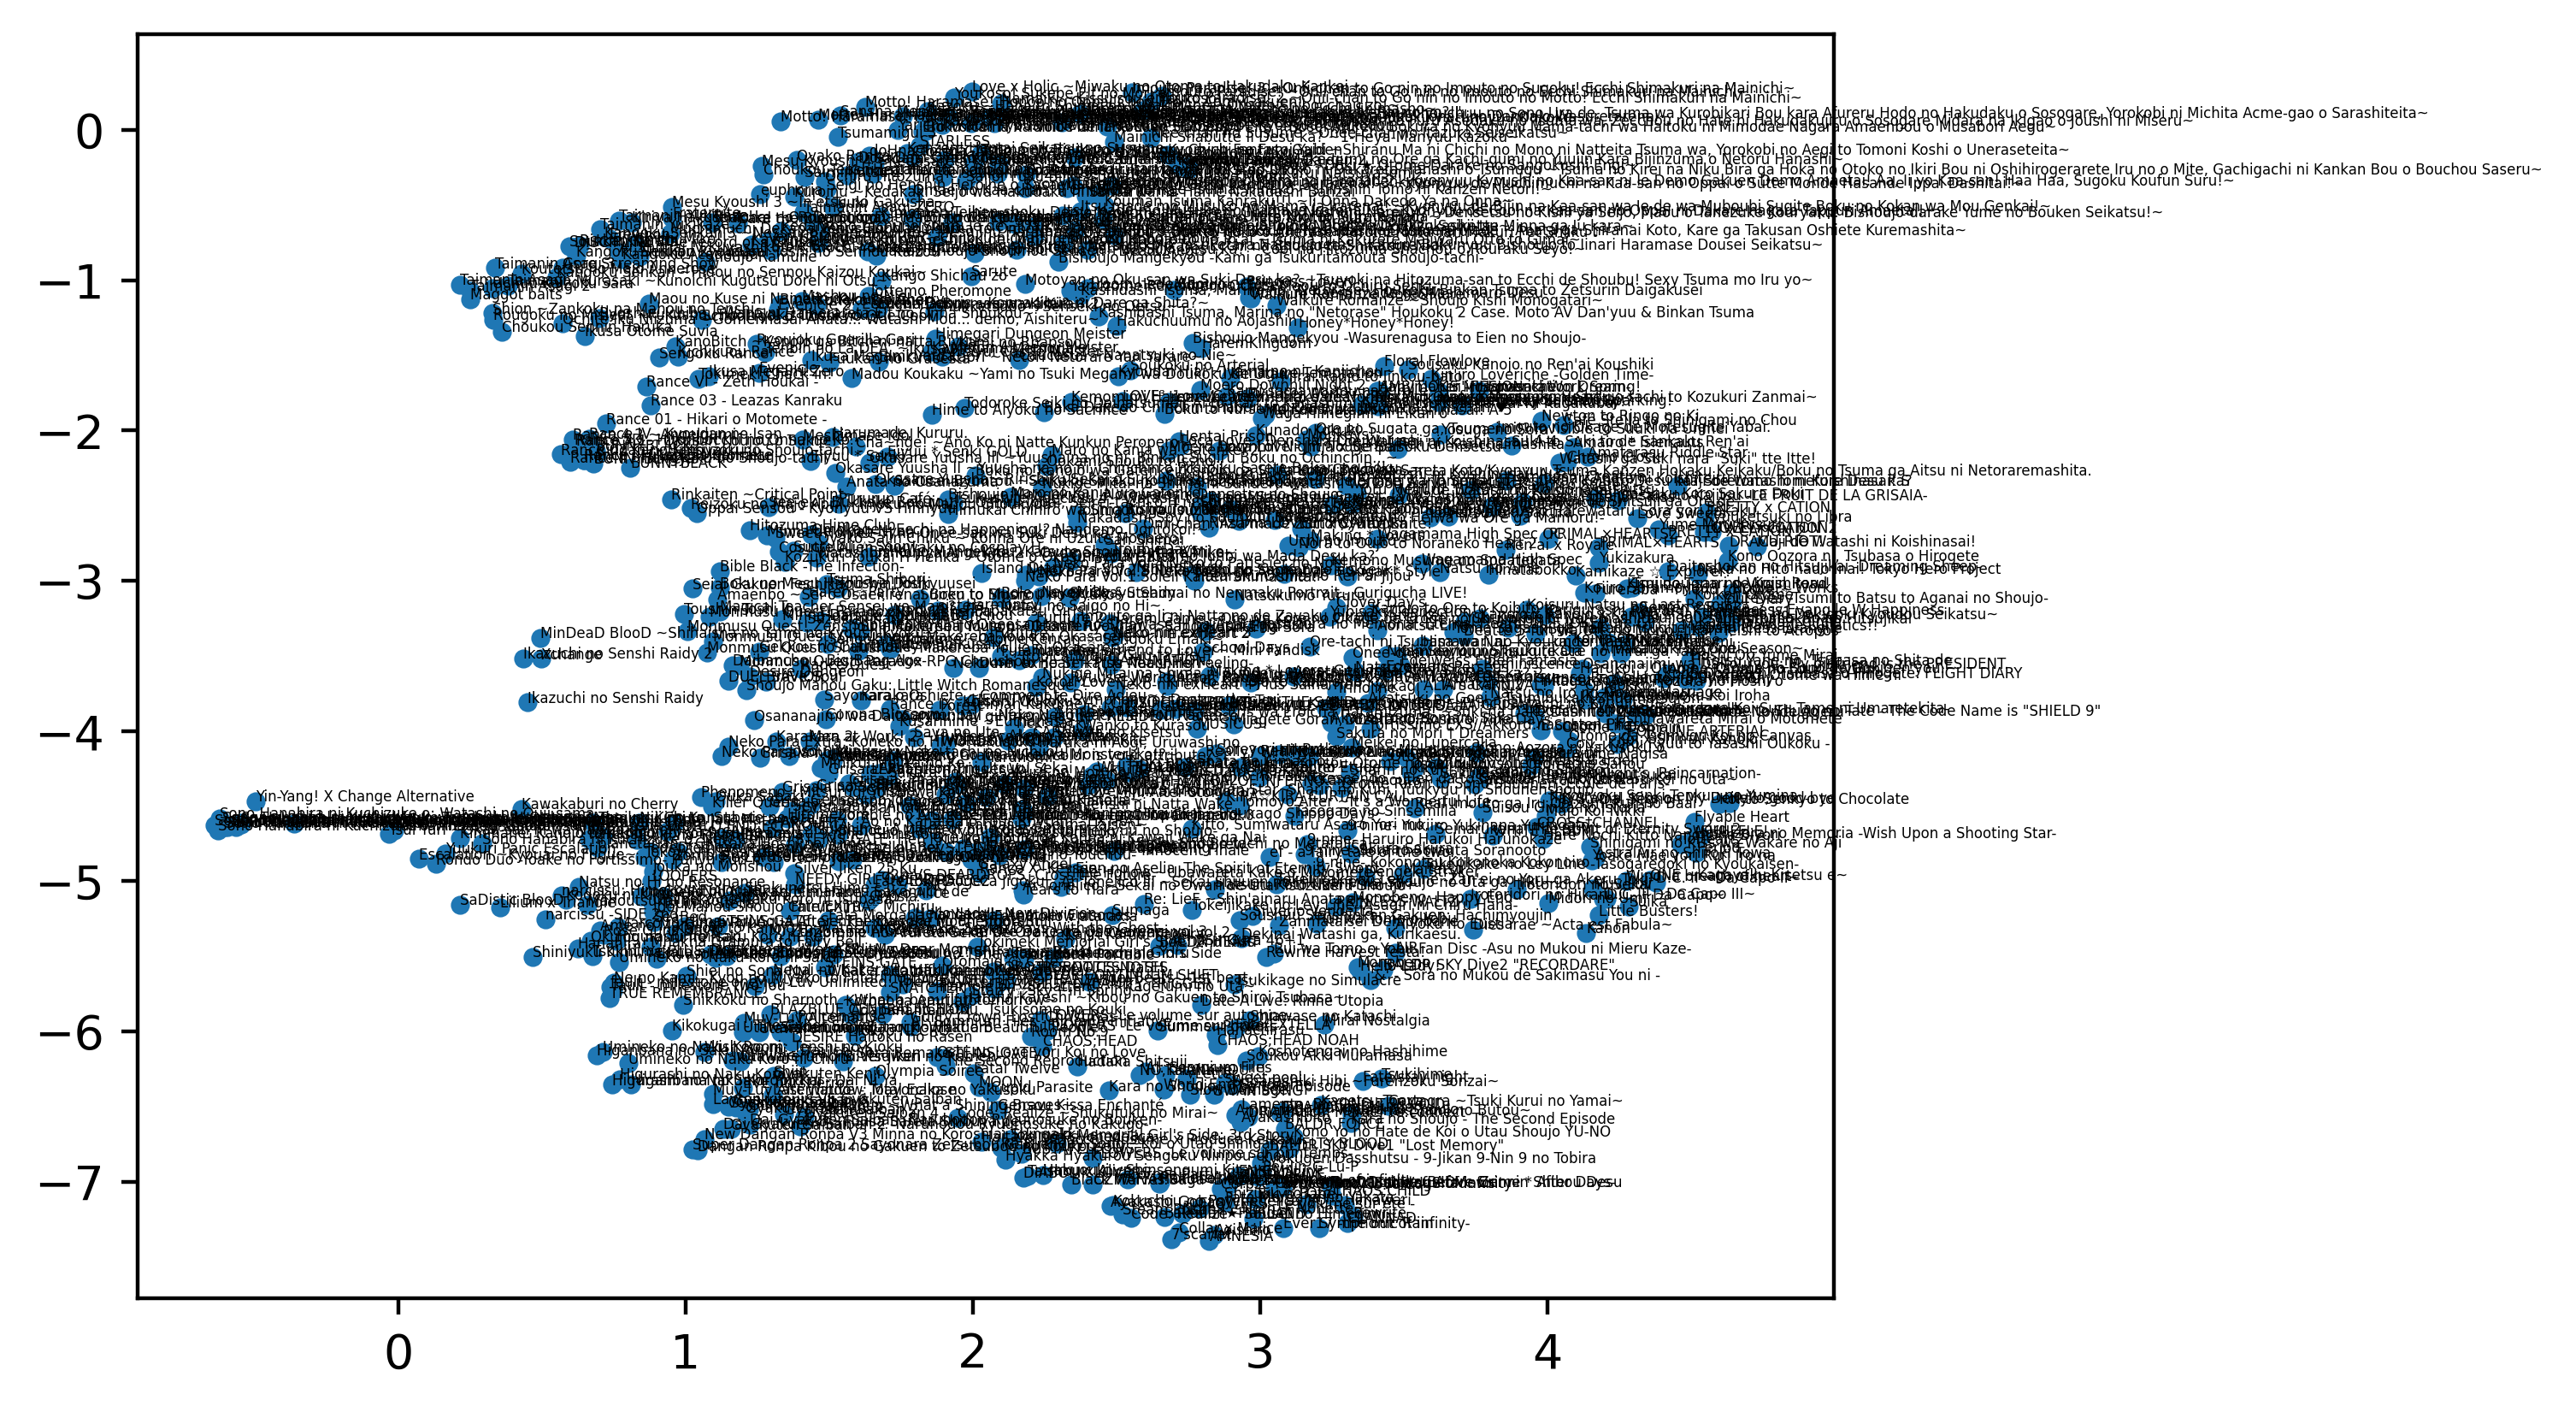

In [61]:
import umap

# running UMAP
# use the non-standardized data X[:, flux_idxs]
map_obj = umap.UMAP()
y_umap = map_obj.fit_transform(tag_df)

fig = plt.figure(dpi=400)

plt.plot(y_umap[:,0], y_umap[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_umap[i, 0], y_umap[i, 1]), fontsize=3)

c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


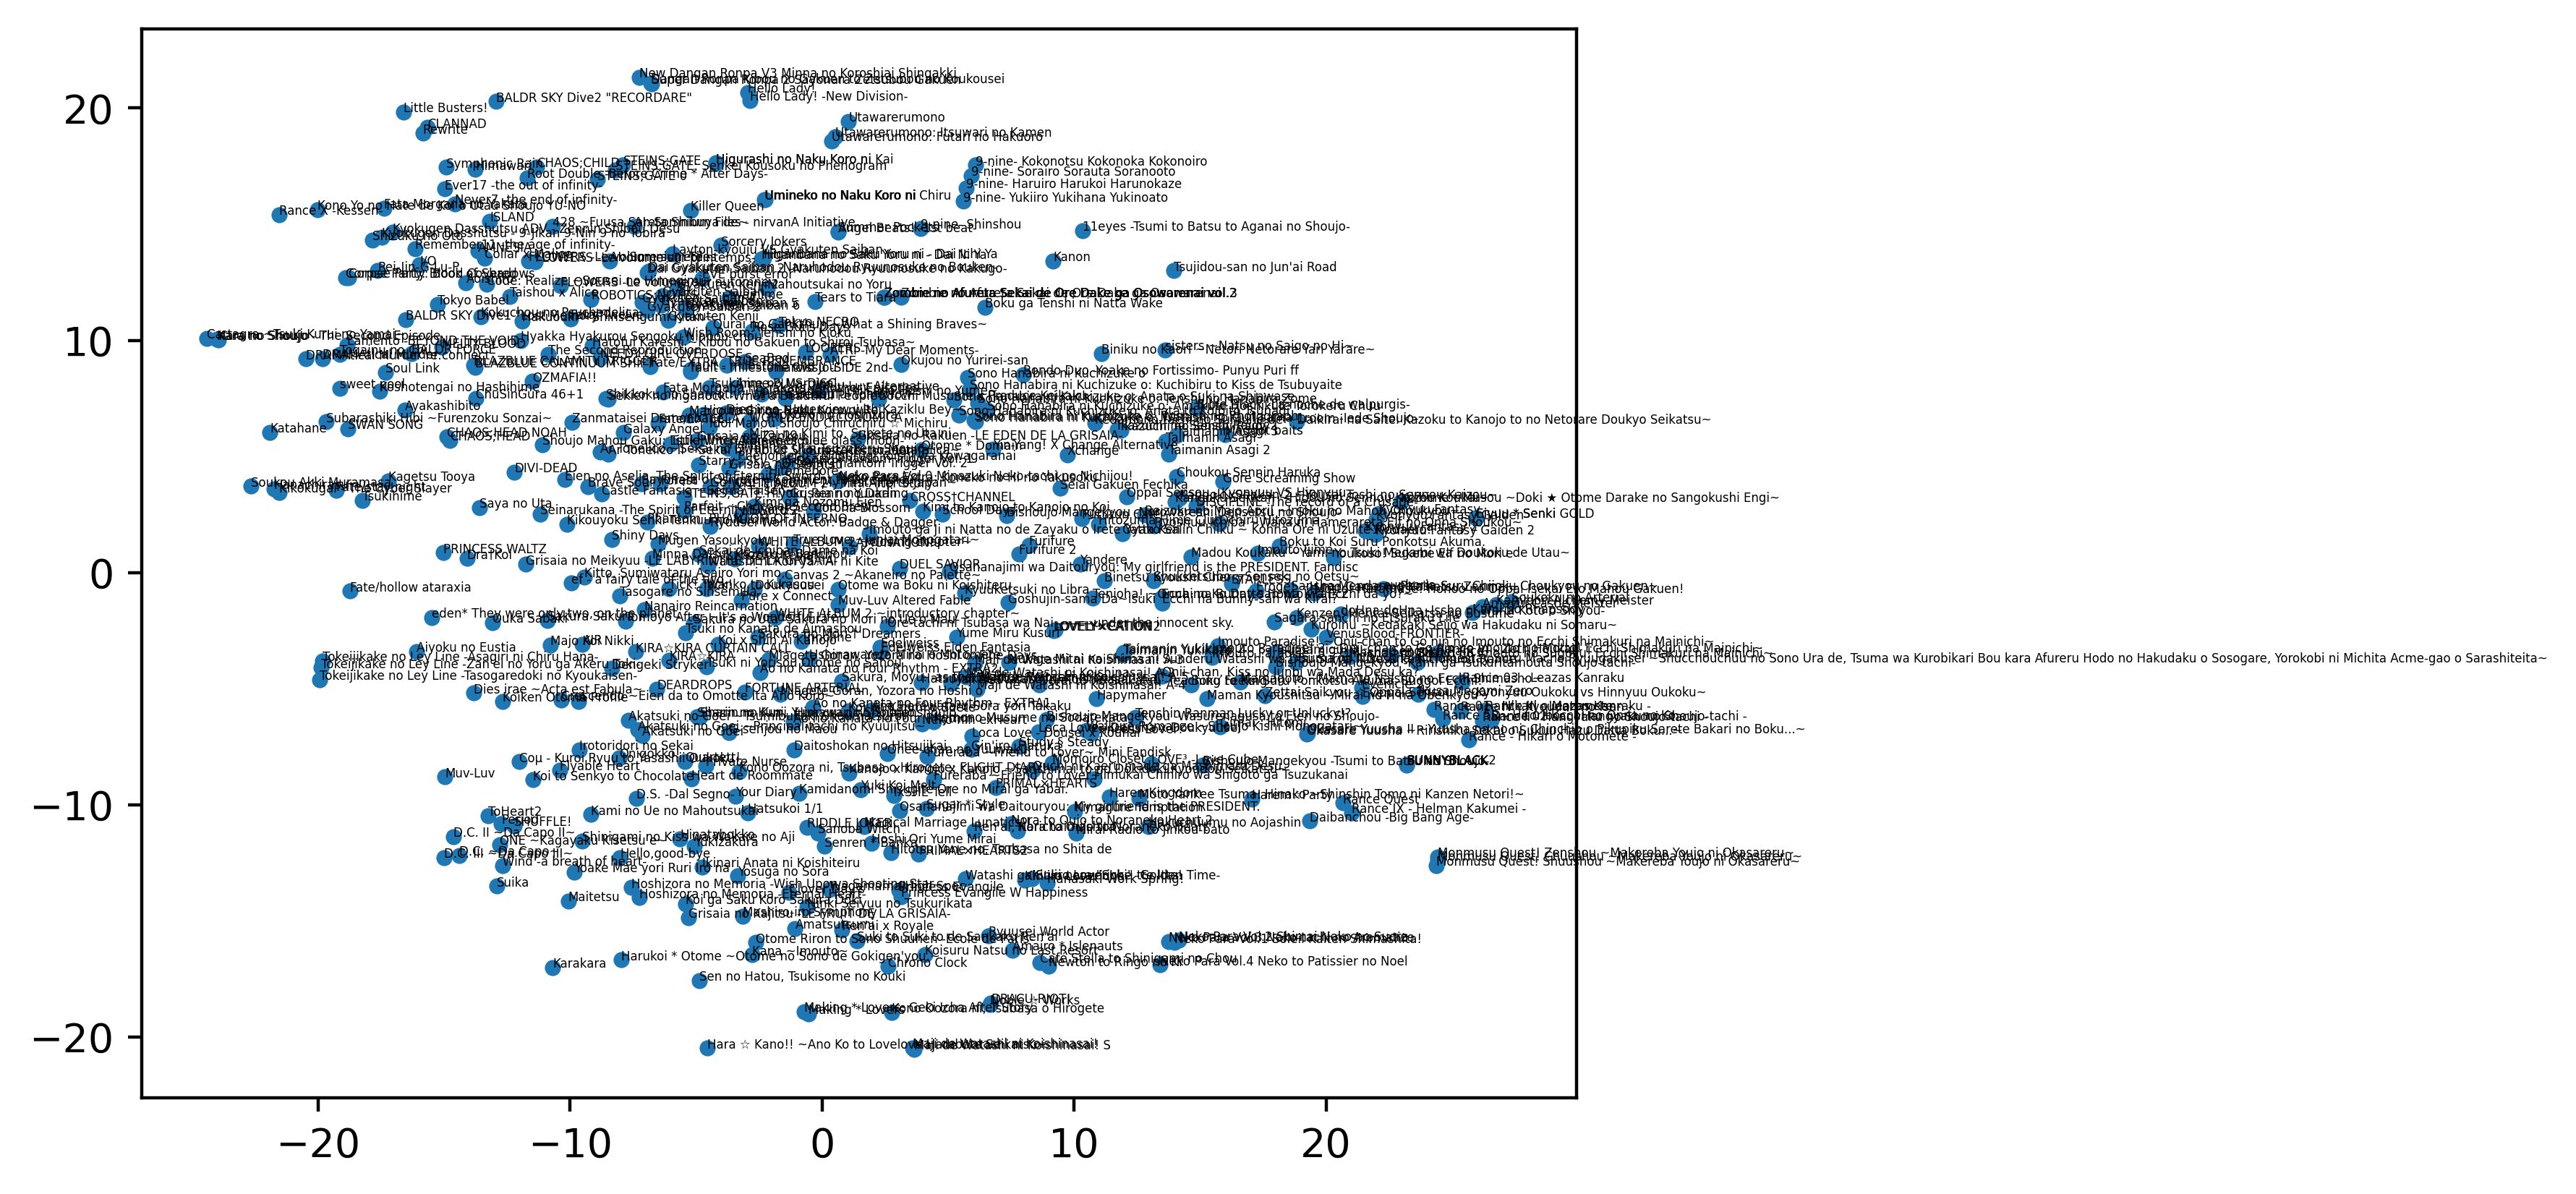

In [42]:
from sklearn.manifold import TSNE

# running t-SNE
# use the non-standardized data X[:, flux_idxs]
tsne = TSNE()
y_tsne = tsne.fit_transform(tag_df)

fig = plt.figure(dpi=400)
plt.plot(y_tsne[:,0], y_tsne[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_tsne[i, 0], y_tsne[i, 1]), fontsize=3)

In [62]:
ML_df = pd.concat((tag_df, df[['length_minutes', 'rating', 'popularity', 'released_unix']]), axis=1)

input_data = ML_df.drop('rating', axis=1)
truth_data = ML_df['rating']

ML_df

g32  g133  g728   g148   g733  g3171   g633    g96  g1581  g1297  ...  \
0     True  True  True   True   True   True   True  False   True   True  ...   
1    False  True  True   True  False  False   True   True   True  False  ...   
2     True  True  True   True  False  False  False   True  False  False  ...   
3     True  True  True   True   True   True   True   True   True   True  ...   
4     True  True  True   True   True   True   True   True   True  False  ...   
..     ...   ...   ...    ...    ...    ...    ...    ...    ...    ...  ...   
951   True  True  True  False   True  False   True   True  False  False  ...   
952   True  True  True   True  False  False  False  False  False  False  ...   
953   True  True  True   True  False   True   True  False  False  False  ...   
954   True  True  True  False   True   True  False  False   True  False  ...   
955   True  True  True   True  False  False  False  False   True  False  ...   

     g1764  g1454   g599  g1343  g1086  g1467  length_minutes  rating  \
0    False  False   True  False  False  False          5160.0    86.1   
1    False  False  False  False  False  False           375.0    80.1   
2    False  False  False   True  False  False          2636.0    90.0   
3    False  False  False   True  False   True          4500.0    83.8   
4    False  False  False   True  False   True          2100.0    82.9   
..     ...    ...    ...    ...    ...    ...             ...     ...   
951  False  False  False  False  False  False          1680.0    71.7   
952  False  False  False   True  False   True            90.0    57.7   
953  False  False  False  False  False  False          1579.0    72.7   
954  False  False  False  False  False  False          3600.0    74.0   
955  False  False  False  False  False  False          1740.0    73.4   

     popularity  released_unix  
0        100.00     1075420800  
1         91.14     1072396800  
2         88.15     1255564800  
3         80.69     1298592000  
4         78.95     1212019200  
..          ...            ...  
951        1.95     1333065600  
952        1.95     1377734400  
953        1.95     1409270400  
954        1.95     1371772800  
955        1.95     1651104000  

[956 rows x 168 columns]

In [63]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

ML_df[['length_minutes', 'popularity', 'released_unix', 'rating']] = scalar.fit_transform(ML_df[['length_minutes', 'popularity', 'released_unix', 'rating']])

input_data = ML_df.drop('rating', axis=1)
input_data[tags_to_keep] = input_data[tags_to_keep].astype(int)
truth_data = ML_df['rating']

input_data

g32  g133  g728  g148  g733  g3171  g633  g96  g1581  g1297  ...  g709  \
0      1     1     1     1     1      1     1    0      1      1  ...     0   
1      0     1     1     1     0      0     1    1      1      0  ...     0   
2      1     1     1     1     0      0     0    1      0      0  ...     0   
3      1     1     1     1     1      1     1    1      1      1  ...     0   
4      1     1     1     1     1      1     1    1      1      0  ...     0   
..   ...   ...   ...   ...   ...    ...   ...  ...    ...    ...  ...   ...   
951    1     1     1     0     1      0     1    1      0      0  ...     0   
952    1     1     1     1     0      0     0    0      0      0  ...     0   
953    1     1     1     1     0      1     1    0      0      0  ...     0   
954    1     1     1     0     1      1     0    0      1      0  ...     0   
955    1     1     1     1     0      0     0    0      1      0  ...     0   

     g1764  g1454  g599  g1343  g1086  g1467  length_minutes  popularity  \
0        0      0     1      0      0      0        3.291572    8.284062   
1        0      0     0      0      0      0       -0.938125    7.487379   
2        0      0     0      1      0      0        1.060484    7.218521   
3        0      0     0      1      0      1        2.708166    6.547725   
4        0      0     0      1      0      1        0.586687    6.391266   
..     ...    ...   ...    ...    ...    ...             ...         ...   
951      0      0     0      0      0      0        0.215428   -0.532503   
952      0      0     0      1      0      1       -1.190051   -0.532503   
953      0      0     0      0      0      0        0.126150   -0.532503   
954      0      0     0      0      0      0        1.912611   -0.532503   
955      0      0     0      0      0      0        0.268465   -0.532503   

     released_unix  
0        -1.293141  
1        -1.308757  
2        -0.362924  
3        -0.140743  
4        -0.587782  
..             ...  
951       0.037270  
952       0.267928  
953       0.430772  
954       0.237144  
955       1.679539  

[956 rows x 167 columns]

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Always split your dataset into train and validation part. We choose a 75:25 division here. Shuffels dataset before split. By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_valid, truth_train, truth_valid = train_test_split(input_data, truth_data, test_size=0.25, random_state=42)

# Create a NN. Loss function is BinaryCrossEntropy. Output layer has 1 node;the prediction for the rating. Learning rate defaults to 0.001. 
model = Sequential([
    Dense(len(input_train.columns),activation='relu',name='input_layer'),
    Dense(400,activation='relu',name='hidden_layer1'),
    Dense(200,activation='relu',name='hidden_layer2'),
    Dense(200,activation='relu',name='hidden_layer3'),
    Dense(1, activation='selu', name='output')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              # loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.LogCosh(),
              metrics=[tf.keras.losses.LogCosh()])

print('--------- TRAINING ---------')
history = model.fit(x = np.array(input_train), y = np.array(truth_train), validation_data=(np.array(input_valid), np.array(truth_valid)), epochs = 50)  
## This trains the model on input_train by comparing to the true values in truth_train. After every epoch of training, the model is evaluated on the validation dataset, 
## namely input_valid and truth_valid.

--------- TRAINING ---------
Epoch 1/50
23/23 [==============================] - 1s 7ms/step - loss: 0.3510 - log_cosh: 0.3525 - val_loss: 0.3206 - val_log_cosh: 0.3165
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2865 - log_cosh: 0.2835 - val_loss: 0.2674 - val_log_cosh: 0.2640
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2276 - log_cosh: 0.2241 - val_loss: 0.2271 - val_log_cosh: 0.2253
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1875 - log_cosh: 0.1889 - val_loss: 0.2176 - val_log_cosh: 0.2170
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1640 - log_cosh: 0.1645 - val_loss: 0.2031 - val_log_cosh: 0.2016
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1454 - log_cosh: 0.1488 - val_loss: 0.1969 - val_log_cosh: 0.1941
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1321 - log_cosh: 0.1353 - val_loss: 0.1956 - val_log_cosh

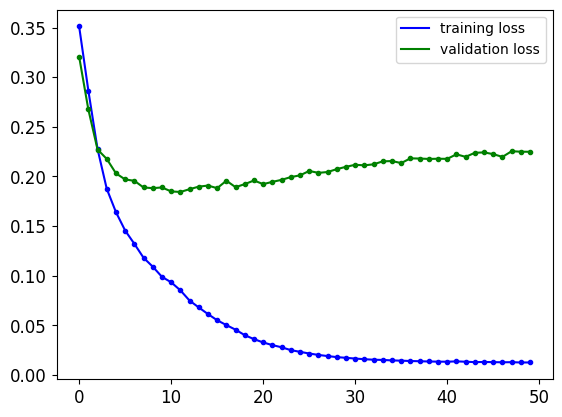

In [71]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig =  plt.figure()
plt.plot(training_loss, 'b', label = 'training loss')
plt.plot(training_loss,'b.')
plt.plot(validation_loss, 'g', label = 'validation loss')
plt.plot(validation_loss, 'g.')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [75]:
abs(model.predict(input_valid)[:,0] - truth_valid).mean()

8/8 [==============================] - 0s 783us/step


0.6034309781413529

8/8 [==============================] - 0s 859us/step


(array([ 8., 10., 16., 28., 44., 69., 37., 21.,  1.,  5.]),
 array([-2.66052949, -2.12424493, -1.58796037, -1.0516758 , -0.51539124,
         0.02089332,  0.55717788,  1.09346244,  1.62974701,  2.16603157,
         2.70231613]),
 <BarContainer object of 10 artists>)

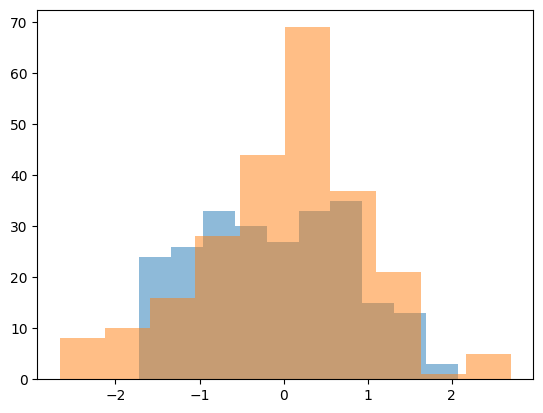

In [73]:
plt.hist(model.predict(input_valid), alpha=0.5)
plt.hist(truth_valid, alpha=0.5)

In [97]:
import shap

shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.KernelExplainer(model, input_valid)
shap_values = explainer.shap_values(input_valid)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], input_valid.iloc[0,:])

shap.summary_plot(shap_values, input_valid, plot_type="bar")


Using 239 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/239 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  0%|          | 1/239 [00:03<15:06,  3.81s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the da

TypeError: list indices must be integers or slices, not tuple

In [110]:
shap.force_plot(explainer.expected_value, shap_values[0][1,:], input_valid.iloc[1,:])


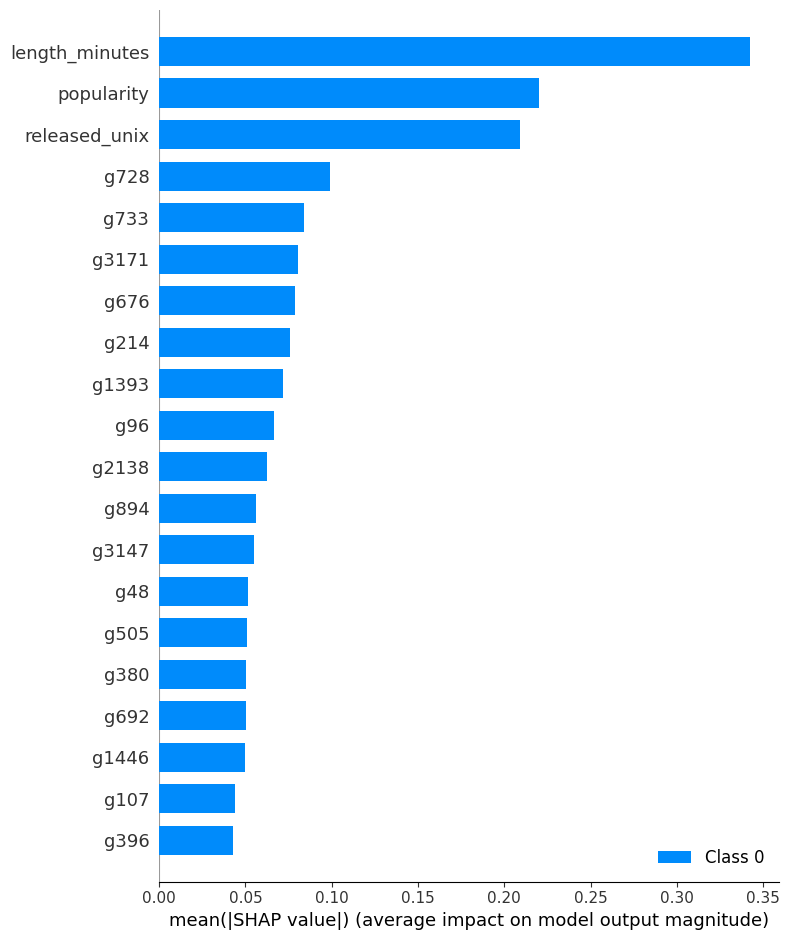

In [108]:
shap.summary_plot(shap_values, input_valid, plot_type="bar")


In [95]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model = Sequential([
        Dense(len(input_train.columns),activation='relu',name='input_layer'),
        Dense(400,activation='relu',name='hidden_layer1'),
        Dense(200,activation='relu',name='hidden_layer2'),
        Dense(200,activation='relu',name='hidden_layer3'),
        Dense(1, activation='selu', name='output')])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              # loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.LogCosh(),
              metrics=[tf.keras.losses.LogCosh()])
    return model

X = input_train
y = truth_train

my_model = KerasRegressor(build_fn=base_model)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())


C:\Users\rizfn\AppData\Local\Temp\ipykernel_13276\237835703.py:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasRegressor(build_fn=base_model)


23/23 [==============================] - 0s 773us/step - loss: 0.3130 - log_cosh: 0.3106


KeyboardInterrupt: 

In [85]:
from eli5.sklearn import PermutationImportance
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5

perm = PermutationImportance(model, random_state=1).fit(input_valid, truth_valid)

eli5.show_weights(perm, feature_names = input_valid.columns.tolist())


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000001AD689EDF90> does not.

In [90]:
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [93]:
from sklearn.inspection import permutation_importance

permutation_importance(model, input_valid, truth_valid)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000001AD689EDF90> does not.